In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [ ]:
data = tf.keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = data.load_data()

img_width, img_height, img_chan = xtrain.shape[1], xtrain.shape[2], 1

xtrain_chan = xtrain.reshape(xtrain.shape[0], img_width, img_height, img_chan)
xtest_chan = xtest.reshape(xtest.shape[0], img_width, img_height, img_chan)

In [ ]:
xtrain_norm = xtrain_chan / 255
xtest_norm = xtest_chan / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.keras.activations.relu, input_shape=(img_width, img_height, img_chan), kernel_initializer=tf.keras.initializers.VarianceScaling()),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation=tf.keras.activations.relu, kernel_initializer=tf.keras.initializers.VarianceScaling()),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, kernel_initializer=tf.keras.initializers.VarianceScaling())
])


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(xtrain_norm, ytrain, epochs=15, validation_data=(xtest_norm, ytest), callbacks=[tensorboard_callback])

Epoch 1/15
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2128 - accuracy: 0.9342 - val_loss: 0.0641 - val_accuracy: 0.9795
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.0399 - val_accuracy: 0.9864
Epoch 3/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 4/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0303 - val_accuracy: 0.9889
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0369 - val_accuracy: 0.9871
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0323 - val_accuracy: 0.9890
Epoch 7/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0283 -

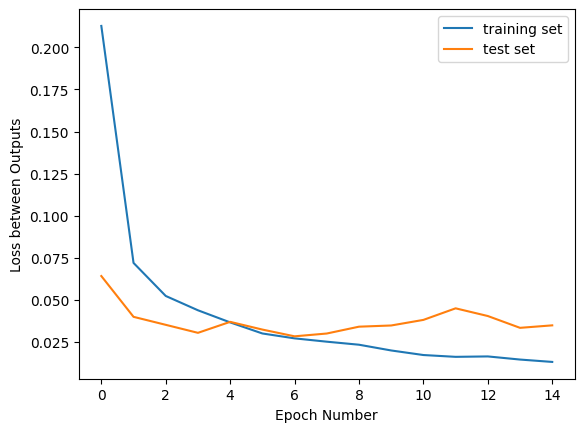

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss between Outputs')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

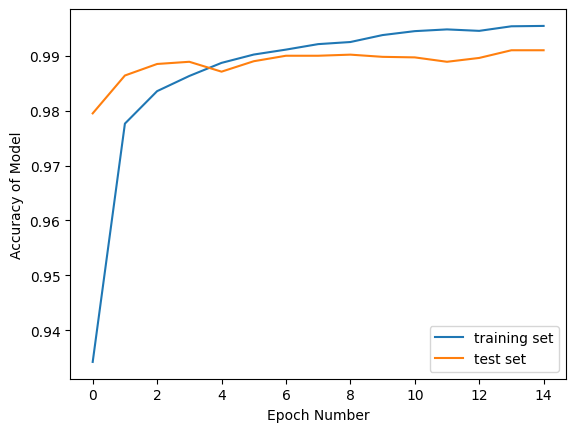

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy of Model')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend(loc='lower right')

In [ ]:
train_loss, train_accuracy = model.evaluate(xtrain_norm, ytrain)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

val_loss, val_accuracy = model.evaluate(xtest_norm, ytest)
print('Validation loss: ', val_loss)
print('Validation accuracy: ', val_accuracy)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0048 - accuracy: 0.9984
Training loss:  0.00482106814160943
Training accuracy:  0.998449981212616
313/313 [==============================] - 2s 6ms/step - loss: 0.0348 - accuracy: 0.9910
Validation loss:  0.034792978316545486
Validation accuracy:  0.9909999966621399


313/313 [==============================] - 2s 6ms/step


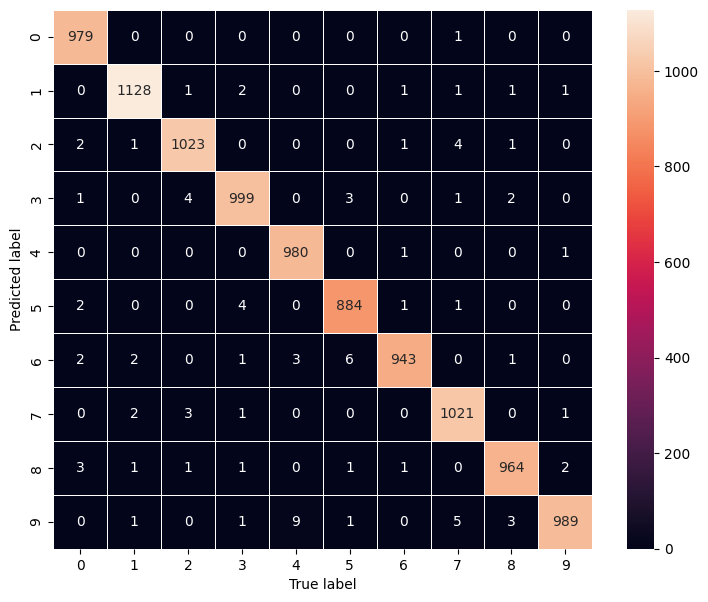

In [ ]:
pred_hot = model.predict([xtest_norm])
predictions = np.argmax(pred_hot, axis=1)

confusion_matrix = tf.math.confusion_matrix(ytest, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()